# 'Targeted Killing': The Drone War in Pakistan

**By Anna Mongillo**

The first CIA drone strike hit the tribal belt (otherwise known as the "lawless frontier") in the Northwest of Pakistan in 2004. Since then, drones have become America's vehicle of choice for eliminating terrorist targets in Pakistan. However, the use of drone strikes has come under fire for being ineffective and immoral as a counterterrorism tactic. It has been said that, although drone strikes certainly have a lower casualty rate and civilian casualty rate than any form of traditional warfare, ["the inherently secret nature of the weapon creates a persistent feeling of fear in the areas where drones hover in the sky, and the hopelessness of communities that are on the receiving end of strikes causes severe backlash -- both in terms of anti-U.S. opinion and violence"](http://www.theatlantic.com/international/archive/2013/08/how-drones-create-more-terrorists/278743/). In other words, drone strikes may create the opportunity for terrorists to sympathize with civilians and recruit from pools of frightened Pakistani citizens, creating terrorists rather than combating them. Now, in 2016, can we show that over a decade of drone strikes have had any effect on the number of terrorist attacks? Can we actually find a correlation between the two? And how do drone strike casualties actually look in terms of morality?

For this exploration, I have used the Bureau of Investigative Journalism's Pakistan data sheets on drone strikes as well as the Global Terrorism Database information on terrorist attacks, read into Python below.

### Import Packages

In [1]:
import sys                              
import matplotlib.pyplot as plt        
import datetime as dt                                      
import numpy as np
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr   
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
Today:  2016-12-14


### Reading in the Data/Data Cleaning

In [2]:
# url1: Pakistan latitude and longitude data for map visualization of drone strikes 
# https://docs.google.com/spreadsheets/d/1P1TSWNwr1j-0pX022Q2iLEZd2-IGoswD08unYSvCYaU/edit#gid=9 
# save as csv onto desktop
path = '/Users/anna/Desktop/pakistan.csv' # read in Pakistan drone strike data
df = pd.read_csv(path) # read into Python from desktop
df=df.replace(to_replace=['Unreported'], value=[np.nan]) # data cleaning for NaN values
df["Date"] = pd.to_datetime(df["Date"]) # change this column to datetime
df["Date"]=df["Date"].dt.year # change datetimes to years

In [3]:
# url2: More in-depth Pakistan drone strike data (casualty rates/summary tables, etc.) for plots
# https://docs.google.com/spreadsheets/d/1NAfjFonM-Tn7fziqiv33HlGt09wgLZDSCP-BQaux51w/edit#gid=694046452
# save as excel file onto desktop
drones=pd.read_excel('/Users/anna/Desktop/CIAdrones.xlsx', 
                     sheetname="Summary tables and casualty rates", skip_footer=25)
drones["Year"]=drones["Year"].dt.year # change this column from datetimes to years
drones=drones.set_index('Year') # read in drone strike summary table and set the index to year

casualtyrates=pd.read_excel('/Users/anna/Desktop/CIAdrones.xlsx', 
                     sheetname="Summary tables and casualty rates", skiprows=21)
casualtyrates=casualtyrates.drop([12,13,14,15,16])
casualtyrates["Year"]=casualtyrates["Year"].dt.year # change this column from datetimes to years
casualtyrates=casualtyrates.set_index('Year') # read in drone strike casualty rate table and set the index to year
casualtyrates=casualtyrates.dropna(axis=1)

In [4]:
# url3: Global Terrorism data 
# http://www.start.umd.edu/gtd/contact/
# save as excel files onto desktop 
gtdto11= pd.read_excel('/Users/anna/Desktop/gtd_92to11_0616dist.xlsx') # read in Global Terrorism Data 1992-2011
pakistan=gtdto11['country_txt'] == 'Pakistan' # create a Boolean variable for country name Pakistan
year=gtdto11['iyear']>2003 # create a Boolean variable for years after 2003
gtdto11count=gtdto11[pakistan & year] # create a new dataframe containing only Pakistan data and years after 2003

gtdto15=pd.read_excel('/Users/anna/Desktop/gtd_12to15_0616dist.xlsx') # read in Global Terrorism Data 2011-2015
pakistan2=gtdto15['country_txt']=='Pakistan' # create a dataframe with only Pakistan data
gtdto15count=gtdto15[pakistan2] # create a series

gtd=gtdto11count.append(gtdto15count, ignore_index=True) # append dataframes from 2004-2011 and 2011-2015

### Plot 1: Number of Drone Strikes and Number of Terrorist Attacks
*Do drone strikes actually have an effect on terrorism?*

Although the below chart seems to visually show that an increase in drone strikes led to a later increase in terrorist attacks, analysis of number of drone strikes compared to number of terrorist attacks reveals a low Pearson's correlation coefficient (0.19), while the p value exceeds threshold (0.55), making a convincing argument that drone strikes and terrorist attacks are not related. 

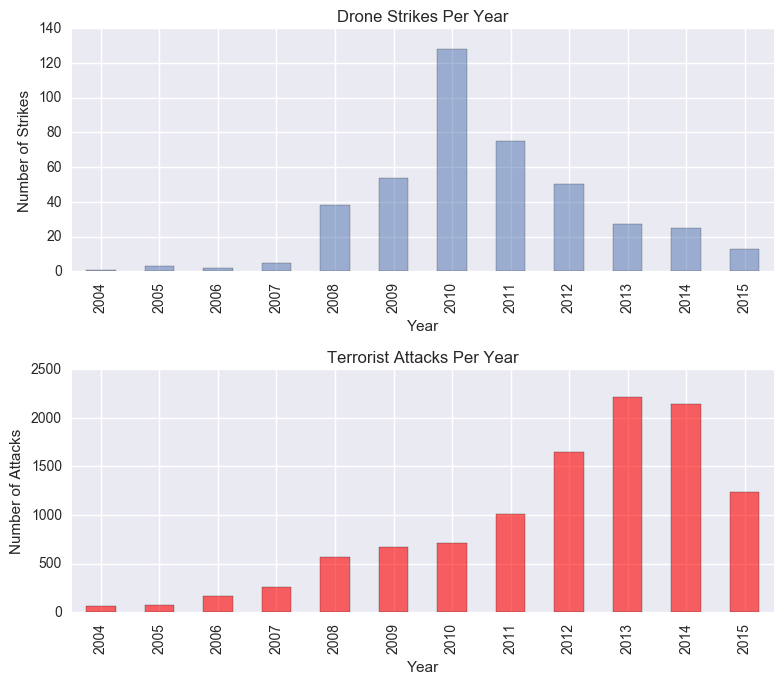

Correlation: (0.1903182575532143, 0.55353330310663429)


In [5]:
numgtd=gtd.groupby('iyear').count() # group global terrorism data by year and set to variable numgtd
numter=numgtd['eventid'] # set new variable numter as number of terrorist attacks by year
numdrones=drones['CIA Drone Strikes'] # set new variable numdrones as number of drone strikes by year
numdrones=numdrones.drop(numdrones.index[[12]]) # drop year 2016 using the index
chartdf=pd.concat([numter, numdrones], axis=1) # create new chart with only numter and numgtd
chartdf=chartdf.dropna() # clean the chart of NaN
eventid=chartdf['eventid'] 
chartdf['eventid']=eventid.astype(int) # convert number of terrorist attacks from float to integer

sns.set_style('darkgrid') # set darkgrid style using Seaborn
fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(8,7)) # create figure with two axes
chartdf['eventid'].plot(ax=ax2, color='r', title='Terrorist Attacks Per Year', 
                        y='Number of Attacks', kind='bar', alpha=0.6)
chartdf['CIA Drone Strikes'].plot(ax=ax1, title='Drone Strikes Per Year', 
                                  y="Number of Strikes", kind='bar', alpha=0.5)
ax2.set_ylabel('Number of Attacks')
ax1.set_ylabel('Number of Strikes')
ax2.set_xlabel('Year')
ax1.set_xlabel('Year')
plt.tight_layout()
plt.show()

print('Correlation:',pearsonr(chartdf['eventid'],chartdf['CIA Drone Strikes'])) #Pearson's correlation and p value

### Plot 2: Monthwise Strikes/Attacks
We have to wonder: perhaps the amount of strikes in a given month will lead to more strikes in that month? However, this plot shows that not even 0.5% of the data is correlated on a monthly level, along with another high p value. Drone strikes are further proven to be unrelated to terrorist attacks.

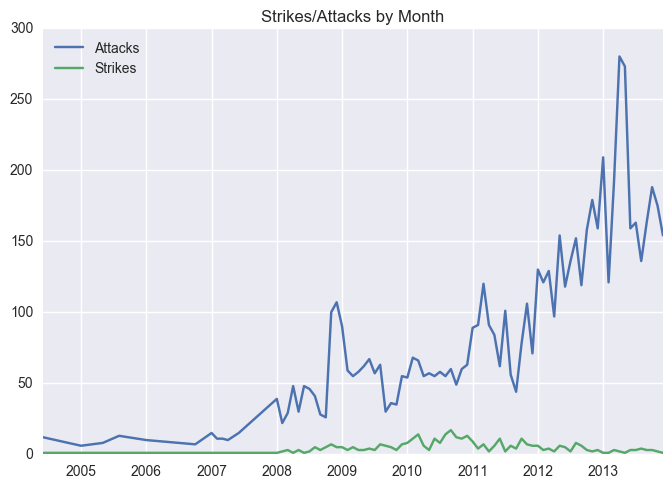

Correlation: (-0.073563942900697246, 0.5086560700866265)


In [6]:
# below is a long process of converting date columns in the Global Terrorism database to datetime:
year=list(gtd['iyear'])
month=list(gtd['imonth'])
day=list(gtd['iday'])
date=(zip(year, month, day))
date=list(date)
date=[str(x)for x in date]
date=[x.replace(', ','-') for x in date]
date=[x.replace('(', '') for x in date]
date=[x.replace(')', '') for x in date]
gtd['idate']=date
gtd["idate"] = pd.to_datetime(gtd["idate"], format='%Y-%m-%d', errors='coerce') # change this column to datetime

per2=gtd.idate.dt.to_period("M") # convert to monthly data
ter2=gtd.groupby(per2) # group by month
ter2=ter2.count() # count number of attacks per month
termonths=ter2['eventid'] # save in new variable

cia='/Users/anna/Desktop/pakistan.csv' # read in Pakistan drone strike data one more time in order to adjust "Date"
cia = pd.read_csv(cia)
cia["Date"] = pd.to_datetime(cia["Date"]) # change this column to datetime

per=cia.Date.dt.to_period("M") # convert to monthly data
cia=cia.groupby(per) #group by month
cia=cia.count() #count number of strikes in each month
dronemonths=cia['Strike'] # save in new variable

totalmonths=pd.concat([termonths, dronemonths], axis=1) # create new dataframe for plotting
totalmonths=totalmonths.dropna() # clean the data frame
totalmonths=totalmonths.rename(columns={'eventid': 'Attacks', 'Strike':'Strikes'})
totalmonths.plot()
plt.title('Strikes/Attacks by Month')
plt.show()

print('Correlation:',pearsonr(totalmonths['Attacks'],totalmonths['Strikes'])) # Pearson's correlation and p value

### Plot 3: Drone Strikes vs. Terrorist Attacks (Normalized)
A better (normalized) visualization of the data:

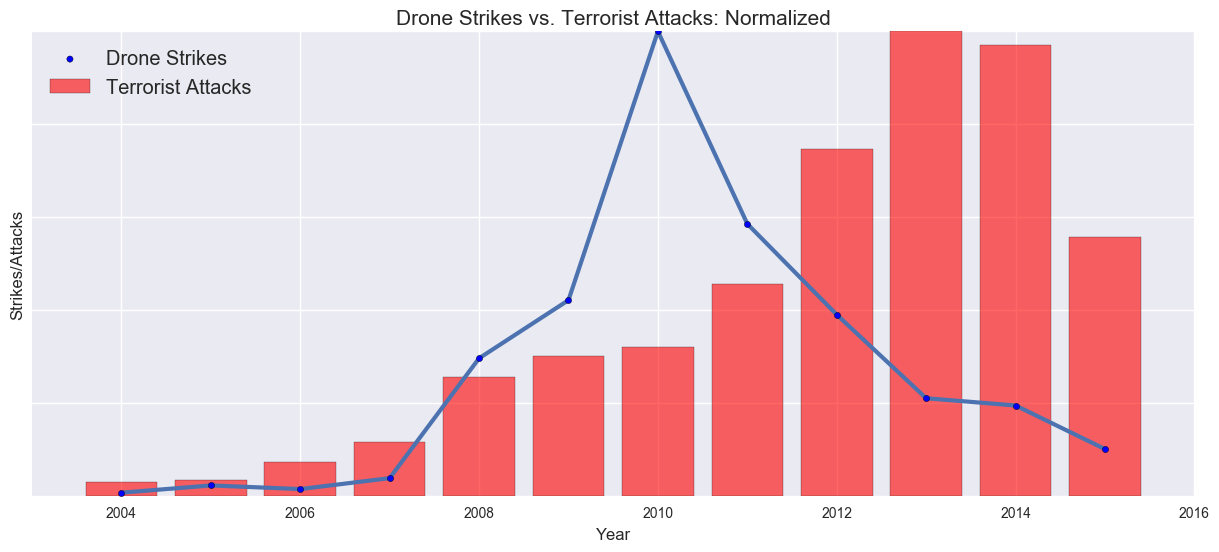

Correlation: (0.19031825755321427, 0.55353330310663429)


In [18]:
x=np.array(numgtd.index) # create x array (years, taken from Global Terrorism Data)
y=np.array(numdrones) # create y array (number of drone attacks)
y=y/y.max().astype(np.float64) # normalize drone strike data on a scale of 0-1 and convert to float
z=np.array(numter) # create x array (number of terrorist attacks)
z=z/z.max().astype(np.float64) # normalize terrorist attack data on a scale of 0-1 and convert to float

plt.figure(figsize=(15,6)) # create a figure of size 15, 6
plt.scatter(x,y, zorder=2, label="Drone Strikes") # plot x and y arrays as a scatter plot (Drone Strikes)
plt.plot(x, y, zorder=1, lw=3) # connect dots with line
plt.bar(x,z, color='red', alpha=0.6, label='Terrorist Attacks', align='center') # plot x and z arrays as a bar chart
plt.title('Drone Strikes vs. Terrorist Attacks: Normalized', fontsize=15)
plt.xlim(2003,2016) # set x upper and lower limits
plt.xlabel("Year", fontsize=12)
plt.ylabel("Strikes/Attacks", fontsize=12)
plt.tick_params(axis='y', labelleft='off', labelright='off') # turn off y axis labels because data is normalized
plt.ylim(0,1) # set y upper and lower limits
plt.legend(loc='best', fontsize='large')
plt.show()

print('Correlation:',pearsonr(y,z)) # Pearson's correlation and p value

### Plot 4: Percent Change of Drone Strikes and Terrorist Attacks
*Is terrorism related to retaliation after a higher/lower increase in drone strikes?*

This plot shows that while terrorism levels certainly aren't decreased by drone strikes, they aren't increased by them directly either...however, a slightly prolonged period of lower percent change in drone strikes (which finally drops below zero at the end of the dataset, meaning that drone strike numbers are decreasing) seems to result in a lower percent change of terrorist attacks, which also drops below zero at the end.

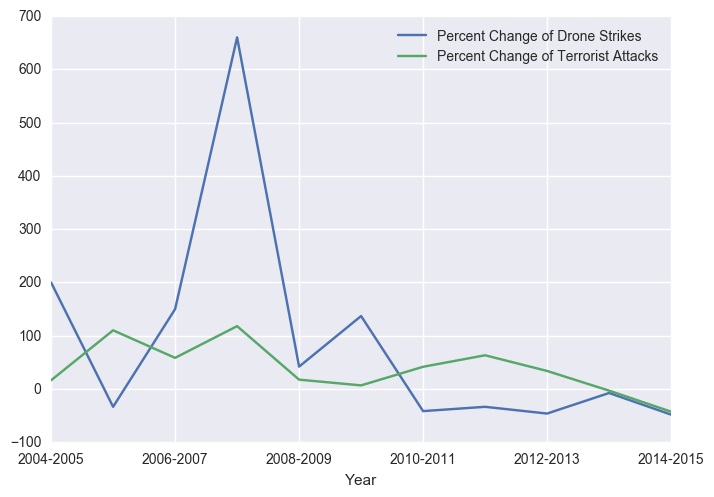

In [8]:
attacks=list(chartdf['eventid'])
diff=[100*(y - x)/x for x, y in zip(attacks[::1], attacks[1::1])] # percent change of terrorist attacks
diff=pd.Series(diff) # turn into series
diff=pd.Series.to_frame(diff) # turn into dataframe
years=['2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010',
               '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015']
years=pd.Series(years) # convert list object to series
years=pd.Series.to_frame(years) # convert series to dataframe 
years=years.rename(columns={0: "Year"})
diff=pd.concat([diff,years], axis=1) # create a dataframe with terrorism % change and years
diff=diff.set_index('Year')
diff=diff.rename(columns={0:'Percent Change of Terrorist Attacks'})

strikes=list(chartdf['CIA Drone Strikes'])
dronediff=[100*(y - x)/x for x, y in zip(strikes[::1], strikes[1::1])] # percent change of terrorist attacks
dronediff=pd.Series(dronediff) # turn into series
dronediff=pd.Series.to_frame(dronediff) # turn into dataframe
years=['2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010',
               '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015']
years=pd.Series(years) # convert list object to series
years=pd.Series.to_frame(years) # convert series to dataframe
years=years.rename(columns={0: "Year"})
dronediff=pd.concat([dronediff,years], axis=1) # create a dataframe with years and drone strike % change
dronediff=dronediff.set_index('Year')
dronediff=dronediff.rename(columns={0:'Percent Change of Drone Strikes'})

combined=pd.concat([dronediff, diff], axis=1) # create a dataframe with drone % change and terrorism % change
combined.plot()
plt.show()

### Plot 5: Drone Strike Casualty Details
*Who is dying?*

Below are two plots that may give insight into the morality of drone strikes: one showing the demographics of those killed in drone strikes and another detailing casualty rates. The demographics show that the most people died between 2007-2012, which is right before terrorist attacks peaked in number. Casualty rates in 2006 were markedly higher than the rest of the years.

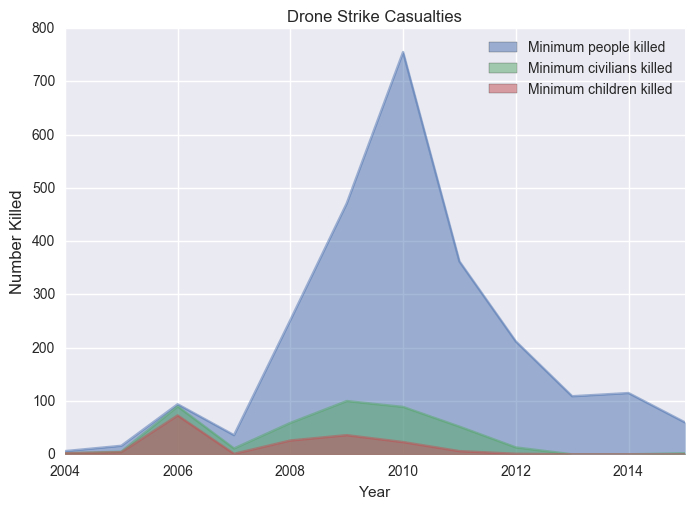

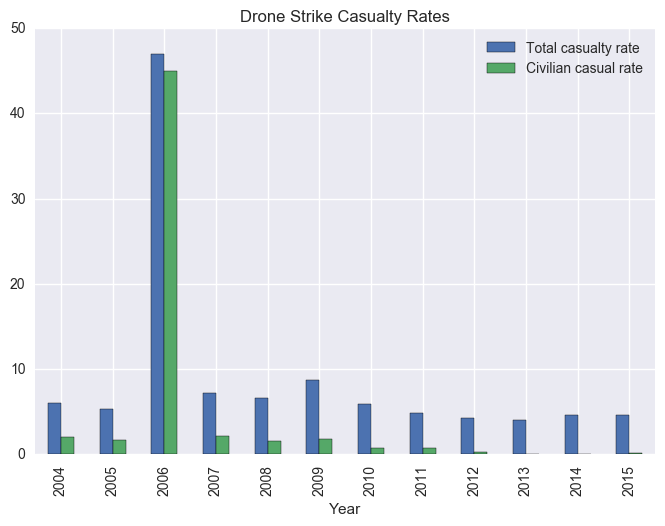

In [9]:
dcasualties=drones["Minimum people killed"]
dcivilians=drones["Minimum civilians killed"]
dchildren=drones['Minimum children killed']
civcas=pd.concat([dcasualties, dcivilians], axis=1)
dronedeaths=pd.concat([civcas, dchildren], axis=1)
dronedeaths=dronedeaths.drop([2016]) # new Dataframe for total, civilian and child casualty rates during drone strikes

dronedeaths.plot.area(stacked=False)
plt.title('Drone Strike Casualties')
plt.ylabel("Number Killed", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Number Killed", fontsize=12)
plt.xlabel("Year")
plt.title('Drone Strike Casualties')
plt.show() # plot the new Dataframe

casualtyrates.plot.bar()
plt.title('Drone Strike Casualty Rates')
plt.show()

### Plot 6: Casualties and Terrorist Attacks
*Are higher drone strike casualties/number of people killed seemingly related to an increase in terrorist attacks?*

Once again, Pearson's r reveals a low correlation and a high p value between casualties and terrorist attacks, making the calculations untrustworthy.

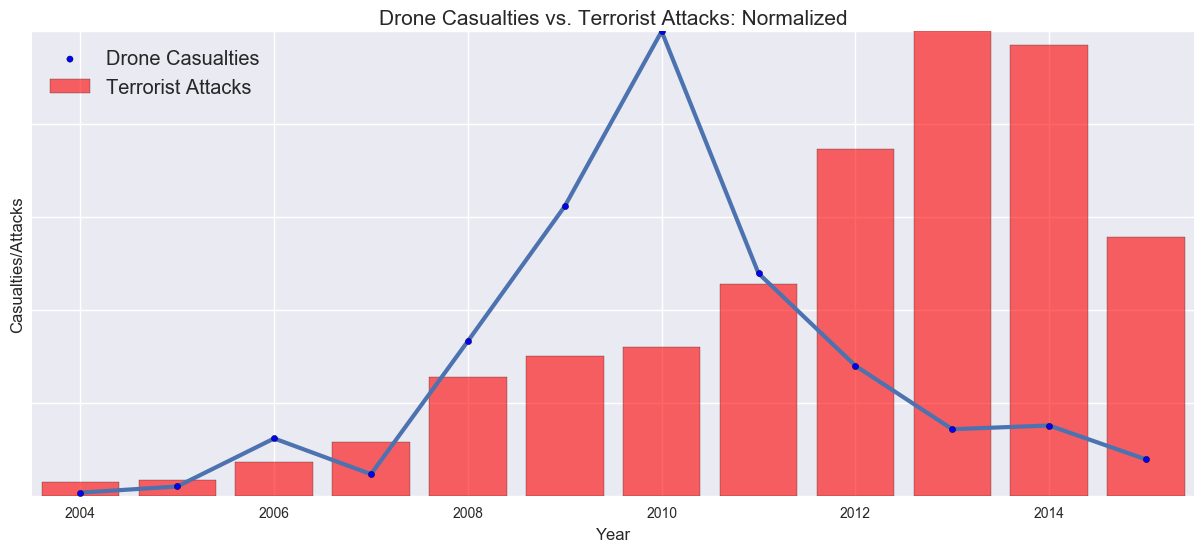

Correlation: (0.034998051539273614, 0.91401248766935861)


In [17]:
dcasualties=dcasualties.drop([2016]) # drop 2016 from casualty because it is not included in numter
x=np.array(numgtd.index) # create x array (years, taken from Global Terrorism Data)
y=np.array(dcasualties) # create y array (casualty rates)
y=y/y.max().astype(np.float64) # normalize casualty rate data on a scale of 0-1 and convert to float
z=np.array(numter) # create x array (number of terrorist attacks)
z=z/z.max().astype(np.float64) # normalize terrorist attack data on a scale of 0-1 and convert to float

plt.figure(figsize=(15,6)) # create a figure of size 15, 6
plt.scatter(x,y, zorder=2, 
            label="Drone Casualties") # plot x and y arrays as a scatter plot (casualty rates)
plt.plot(x, y, zorder=1, lw=3) # connect dots with line
plt.bar(x,z, color='red', alpha=0.6, label='Terrorist Attacks', align='center') # plot x and z arrays as a bar chart
plt.title('Drone Casualties vs. Terrorist Attacks: Normalized', fontsize=15)
plt.xlim(2003.5,2015.5) # set x upper and lower limits
plt.xlabel("Year", fontsize=12)
plt.ylabel("Casualties/Attacks", fontsize=12)
plt.tick_params(axis='y', labelleft='off', labelright='off') # turn off y axis labels because data is normalized
plt.ylim(0,1) # set y upper and lower limits
plt.legend(loc='best', fontsize='large')
plt.show()

print('Correlation:',pearsonr(y,z)) # Pearson's correlation and p value

# Appendix
*Map Visualizations: where are the drone strikes targeted? Where are the terrorist attacks centered?*

The below vizualization seems to show that drone strikes, unlike terrorist attacks, are concentrated in the tribal belt of Pakistan in the Northwest.

In [11]:
lat=df["Latitude"]
long=df["Longitude"]
coordinates=pd.concat([lat, long], axis=1) # new DataFrame for latitude and longitude of drone strikes

lat2=gtd["latitude"]
long2=gtd["longitude"]
coordinates2=pd.concat([lat2, long2], axis=1) # new DataFrame for latitude and longitude of terrorist attacks

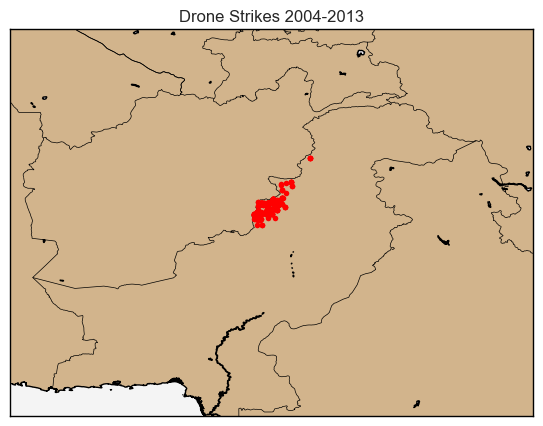

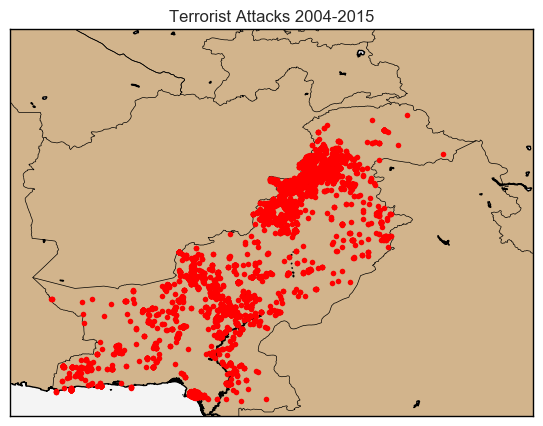

In [12]:
fig = plt.figure(figsize=(10,5)) # create a figure with size 10,5
map = Basemap(projection='gall', # make the figure a Basemap map (Gall projection)
              resolution = 'h',  # high image resolution, with latitude and longitude upper and lower bounds
              area_thresh = 0.1,
              llcrnrlon=60, llcrnrlat=24,
              urcrnrlon=80, urcrnrlat=40,
              lat_0=30, lon_0=70)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'tan')
map.drawmapboundary(fill_color='#f4f4f4')
x,y = map(list(coordinates['Longitude']), list(coordinates['Latitude'])) # set my coordinates df as x and y values
map.plot(x, y, 'ro', markersize=4) # plot my coordinates df points onto the map with point size 4 and color red
plt.title('Drone Strikes 2004-2013')
plt.show()

fig = plt.figure(figsize=(10,5)) # create a figure with size 10,5
map = Basemap(projection='gall', # make the figure a Basemap map
              resolution = 'h',  # high resolution, with latitude and longitude upper and lower bounds
              area_thresh = 0.1,
              llcrnrlon=60, llcrnrlat=24,
              urcrnrlon=80, urcrnrlat=40,
              lat_0=30, lon_0=70)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'tan')
map.drawmapboundary(fill_color='#f4f4f4')
x,y = map(list(coordinates2['longitude']), list(coordinates2['latitude'])) # set my coordinates gtd as x and y values
map.plot(x, y, 'ro', markersize=4) # plot my coordinates gtd points onto the map 
plt.title('Terrorist Attacks 2004-2015')
plt.show()

## Change of Location?
*Map visualization: Are the terrorists just moving locations?*

The below map visualization seems to show a spreading-out of terrorist attacks from 2004 to 2015, growing more frequent in more areas. Perhaps the terrorists have been simply moving locations or spreading out throughout the years we have analyzed, and that is why attacks have been increasing.

In [13]:
terattacks=gtd.set_index(['iyear'])
ter2004=terattacks.loc[2004] # terrorist attacks in 2004
ter2015=terattacks.loc[2015] # terrorist attacks in 2015

lat2004=ter2004['latitude']
long2004=ter2004['longitude']
terfinal2004=pd.concat([lat2004, long2004], axis=1) # new Dataframe for coordinates of 2004 attacks

lat2015=ter2015['latitude']
long2015=ter2015['longitude']
terfinal2015=pd.concat([lat2015, long2015], axis=1) # new Dataframe for coordinates of 2015 attackss

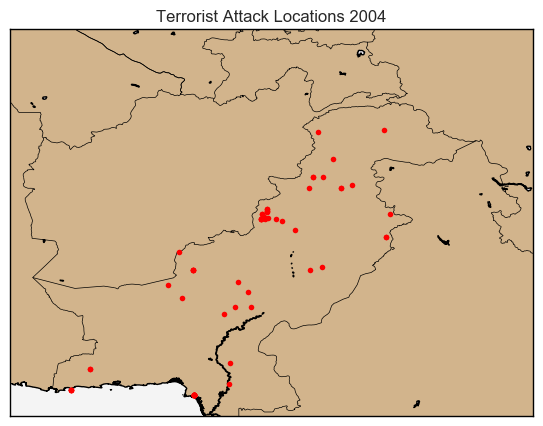

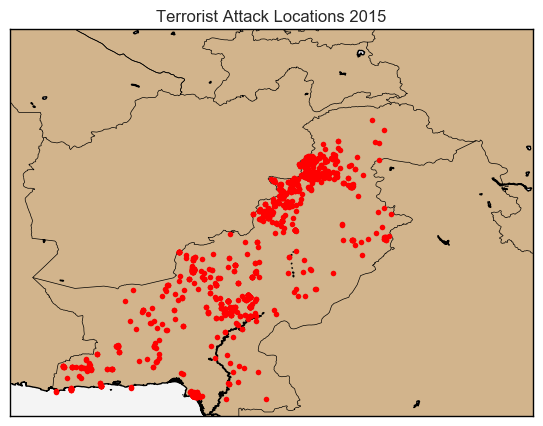

In [14]:
fig = plt.figure(figsize=(10,5)) # create a figure with size 10,5
map = Basemap(projection='gall', # make the figure a Basemap map (Gall projection)
              resolution = 'h',  # high image resolution, with latitude and longitude upper and lower bounds
              area_thresh = 0.1,
              llcrnrlon=60, llcrnrlat=24,
              urcrnrlon=80, urcrnrlat=40,
              lat_0=30, lon_0=70)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'tan')
map.drawmapboundary(fill_color='#f4f4f4')
x,y = map(list(terfinal2004['longitude']), list(terfinal2004['latitude'])) # set my coordinates as x and y values
map.plot(x, y, 'ro', markersize=4) # plot my coordinates 2004 points onto the map with point size 4 and color red
plt.title('Terrorist Attack Locations 2004')
plt.show()

fig = plt.figure(figsize=(10,5)) # create a figure with size 10,5
map = Basemap(projection='gall', # make the figure a Basemap map
              resolution = 'h',  # high resolution, with latitude and longitude upper and lower bounds
              area_thresh = 0.1,
              llcrnrlon=60, llcrnrlat=24,
              urcrnrlon=80, urcrnrlat=40,
              lat_0=30, lon_0=70)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'tan')
map.drawmapboundary(fill_color='#f4f4f4')
x,y = map(list(terfinal2015['longitude']), list(terfinal2015['latitude'])) # set my coordinates as x and y values
map.plot(x, y, 'ro', markersize=4) # plot my coordinates 2015 points onto the map 
plt.title('Terrorist Attack Locations 2015')
plt.show()

# Summary


In summary, while drone strikes cannot necessarily be proven to correlate with increases in terrorist attacks due to factors like retaliation, the data visualizations point more to that than to the idea that drone strikes prevent or combat terrorism. This could be due to the fact that, as seen in the Appendix, terrorist attacks are more spread out than drone strikes, so the drone strikes are hardly affecting terrorists. Nevertheless, after many years of consecutively 'targeting' terrorism in Pakistan using drone strikes, their effectiveness as a counterterrorism tactic cannot be proven--a worrisome concept.